In [1]:
!pip3 install python-louvain
!pip3 install networkx

The directory '/home/kn/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/kn/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
  Running setup.py install for python-louvain ... done
The directory '/home/kn/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/kn/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you 

## Read the data from a social graph
Originally from [here](https://snap.stanford.edu/data/email-Eu-core.html).

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns


data_path = 'facebook_combined.txt'
G_social = nx.read_edgelist(data_path)

## Take a look on the graph

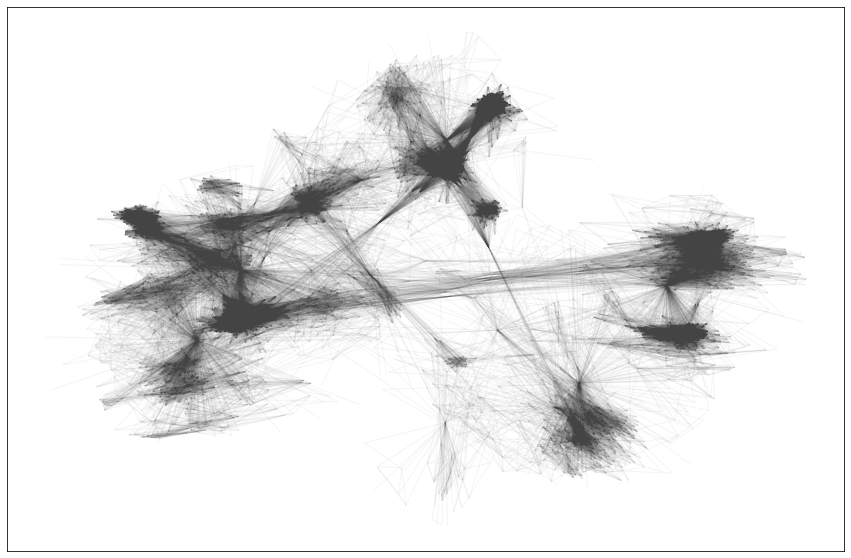

In [6]:
pos = nx.spring_layout(G_social, k=0.1)
plt.rcParams.update({'figure.figsize': (15, 10)})
nx.draw_networkx(
    G_social, 
    pos=pos, 
    node_size=0, 
    edge_color="#444444", 
    alpha=0.05, 
    with_labels=False)

## Build communities using Louvain method and draw the result with different colors
Please refer to [official documentations](https://github.com/taynaud/python-louvain)

Hint: use `cmap='...'` property in `draw_networkx_nodes` together with `vmax` and `vmin`.

In [7]:
import community as community_louvain

In [8]:
def plot(X, y):
    filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X', 'o', '<', '*')
    data = {}
    data['x'] = X[:,0]
    data['y'] = X[:,1]
    data['class'] = y
    plt.figure(figsize=(15,10))
    sns.scatterplot(
        x="x", y="y",
        style="class", hue="class",
        markers=filled_markers,
        data=data,
        legend=False,
        alpha=0.7
    )

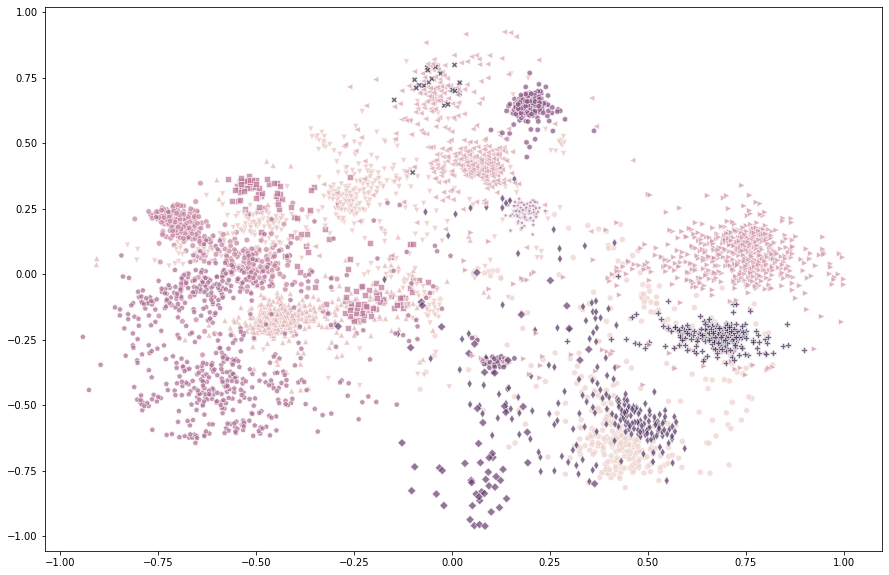

In [10]:
import numpy as np

## TODO: write your code here instead of next line
partition = community_louvain.best_partition(G_social)


# nx.draw_networkx_edges(G_social, pos, alpha=0.01)
X = []
y = []
for key in partition.keys():
    X.append(pos[key])
    y.append(partition[key])

plot(np.array(X), y)

In [14]:
from sklearn.metrics import silhouette_score
print("SC =", silhouette_score(X, y, metric='euclidean'))

SC = 0.1509087883933639
